# Correlating Test to Theory - Peroni Bottle Case

In [1]:
from os import chdir
import pandas as pd
# import numpy as np
from numpy import linspace, exp, arange
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
%run peroni_bottle.py
%run container.py
%run beer.py
%run thermal_resistance.py
%matplotlib inline

In [2]:
chdir('/Users/christophegarant/Documents/GitHub/BevChill/server/Theory')

In [3]:
pwd

'/Users/christophegarant/Documents/GitHub/BevChill/server/Theory'

In [4]:
chdir('/Users/christophegarant/Documents/GitHub/BevChill/TestResults')

In [5]:
pwd

'/Users/christophegarant/Documents/GitHub/BevChill/TestResults'

In [6]:
ls

DogFishHead_Can_OpenBevvsClosedBevTempDiff_20190726.csv
DogFishHead_Can_WarmUpOpened_20190726.csv
DogFishHead_SeaQuenchAle_Can_20190726.csv
Notes.md
Perroni_20190716.csv
Perroni_20190719.csv
Perroni_20190724 Part 1.csv
Perroni_20190724_Part2.csv
Perroni_20190724_Part3.csv
Perroni_bottle_20190725.csv
Perroni_bottle_20190811.csv
Perroni_bottle_20190811_opened_vs_unopened.csv
Perroni_bottle_20190812.csv
Water_in_Perroni_Bottle_20190716.csv


In [7]:
p = pd.read_csv('Perroni_bottle_20190812.csv')

In [8]:
p.head()

,elapsed_time,tempC_amb,elapsed_time_formatted,tempF_amb,tempC_probe,tempF_probe,time_stamp,humidity
0,1,23.0,0:00:01,73.4,21.437,70.5866,08/12/19 19:25:55,49.0
1,11,23.0,0:00:11,73.4,21.437,70.5866,08/12/19 19:26:05,49.0
2,21,23.0,0:00:21,73.4,21.437,70.5866,08/12/19 19:26:15,49.0
3,31,23.0,0:00:31,73.4,21.437,70.5866,08/12/19 19:26:25,49.0
4,41,23.0,0:00:41,73.4,21.437,70.5866,08/12/19 19:26:35,49.0


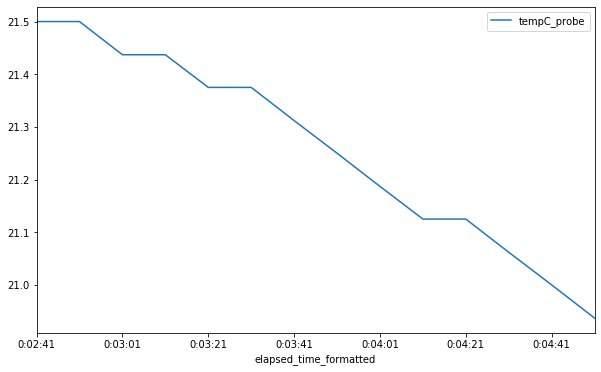

In [9]:
p[16:30].plot(x='elapsed_time_formatted',y='tempC_probe',figsize=(10,6))

In [10]:
p.tail()

,elapsed_time,tempC_amb,elapsed_time_formatted,tempF_amb,tempC_probe,tempF_probe,time_stamp,humidity
349,3492,1.0,0:58:12,33.8,0.750,33.3500,08/12/19 20:24:06,27.0
350,3502,1.0,0:58:22,33.8,0.687,33.2366,08/12/19 20:24:16,27.0
351,3512,1.0,0:58:32,33.8,0.625,33.1250,08/12/19 20:24:26,27.0
352,3522,1.0,0:58:42,33.8,0.562,33.0116,08/12/19 20:24:36,27.0
353,3532,1.0,0:58:52,33.8,0.500,32.9000,08/12/19 20:24:46,27.0


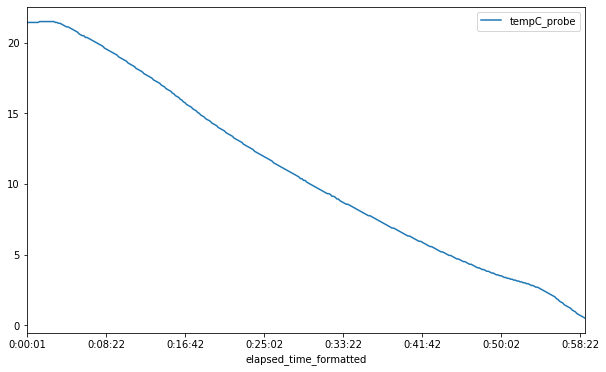

In [11]:
p.plot(x='elapsed_time_formatted',y='tempC_probe',figsize=(10,6))

In [12]:
chdir('/Users/christophegarant/Documents/GitHub/BevChill/server/Theory')

In [13]:
ls

BevChill Theory.ipynb
Correlate_Test_to_Theory_Peroni_Bottle.ipynb
ODE Solver Example.ipynb
__pycache__/
beer.py
chill_timer.py
container.py
images/
peroni_bottle.py
scriptTest.py
theory_brainstorm_notes.md
thermal_resistance.py


In [14]:
beer = Beverage(peroni_bottle)
bottle = Container(peroni_bottle)

In [15]:
start_temp = p['tempC_probe'][10]
start_temp

21.5

In [16]:
atm_temp = p['tempC_amb'][10]
atm_temp

22.0

In [17]:
t = ThermalResistance(beer,bottle,start_temp,atm_temp)


Initial Conditions
------------------------------
T_atm 295.15 degK
T_inf 276 degK
T_s 294.65 degK
gravity 9.81 m/s^2
radiation coefficient sigma 5.67e-08 [W/(m**2*degK**4)]
------------------------------



In [18]:
R_total = t.calculate_total_resistance()

Calculations
------------------------------
Ra is 130916243.44424078
h_inner is 232.23198895338723
R1 is 0.16557023172664556
R2 is 3.911595300162894
h_outter is 5.235386029274421
R3 is 6.488730790669638
h_rad is 91.47195087656917
R4 is 0.37138172088441124
R_total is 4.428441987390217
------------------------------



In [19]:
T_init = t.get_T_init()
T_inf = t.T_inf
t_sec = 4*60*60  #60 min/hr * 60 sec/min = sec/hr
t_eval = arange(0,t_sec+1,10)

In [20]:
#checks
print(beer.rho)
print(beer.C)
print(bottle.volume)
print(R_total)
print(T_inf)
print(T_init)
print(t_eval)

1004.9999999999999
4211
0.000355
4.428441987390217
276
294.65
[    0    10    20 ... 14380 14390 14400]


In [21]:
#heat transfer equation ,first order ordinary differential equation (ODE)
#see scipy.integrate.solve_ivp docs
def dTdt(t,T):
    return -(T - T_inf)/((R_total)*(beer.rho*bottle.volume*beer.C))

In [22]:
sol = solve_ivp(dTdt,[0, t_sec],[T_init],t_eval=t_eval) 
                #dif eq, time lapse,initial temp, eval

t = sol.t         #seconds
time = t/3600     #hours
T = sol.y[0]      #solution temperatures degK
T_C = T - 273.15  #convert degK to degC

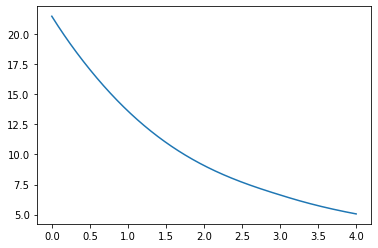

In [23]:
plt.plot(time,T_C)

In [24]:
#grab start of calc data and put with sync'd start of recorded data
p4 = pd.DataFrame()
p4['elapsed_time_calc']=pd.Series(t)
p4['tempC_calc']=pd.Series(T_C)

In [25]:
#check for alignment and agreement with time and temp for sync'd plot
p4.head(20)

,elapsed_time_calc,tempC_calc
0,0,21.500000
1,10,21.471989
2,20,21.444021
3,30,21.416094
4,40,21.388210
5,50,21.360367
6,60,21.332566
7,70,21.304807
8,80,21.277090
9,90,21.249414


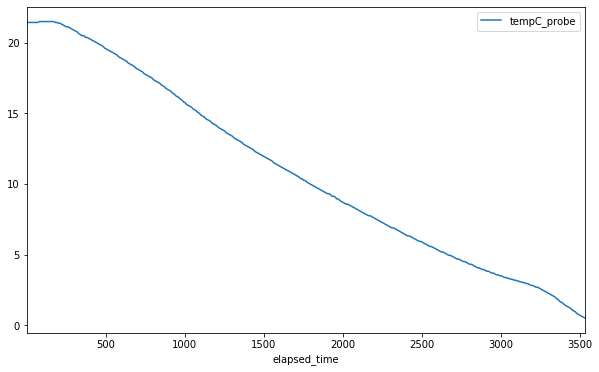

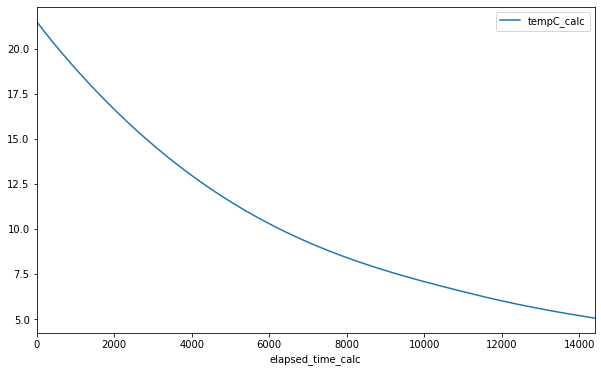

In [26]:
p.plot(x='elapsed_time',y=['tempC_probe'],figsize=(10,6))
p4.plot(x='elapsed_time_calc',y='tempC_calc',figsize=(10,6))

In [27]:
R_total = 2

In [28]:
sol = solve_ivp(dTdt,[0, t_sec],[T_init],t_eval=t_eval) 
                #dif eq, time lapse,initial temp, eval

t = sol.t         #seconds
time = t/3600     #hours
T = sol.y[0]      #solution temperatures degK
T_C2 = T - 273.15  #convert degK to degC

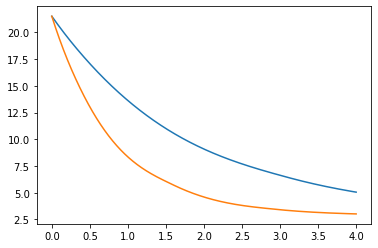

In [29]:
plt.plot(time,T_C)
plt.plot(time,T_C2)

In [30]:
#grab start of calc data and put with sync'd start of recorded data
p2 = pd.DataFrame()
p2['elapsed_time_calc']=pd.Series(t)
p2['tempC_calc']=pd.Series(T_C2)

#check for alignment and agreement with time and temp for sync'd plot
p2.head(20)

,elapsed_time_calc,tempC_calc
0,0,21.500000
1,10,21.438035
2,20,21.376276
3,30,21.314722
4,40,21.253372
5,50,21.192227
6,60,21.131284
7,70,21.070544
8,80,21.010006
9,90,20.949669


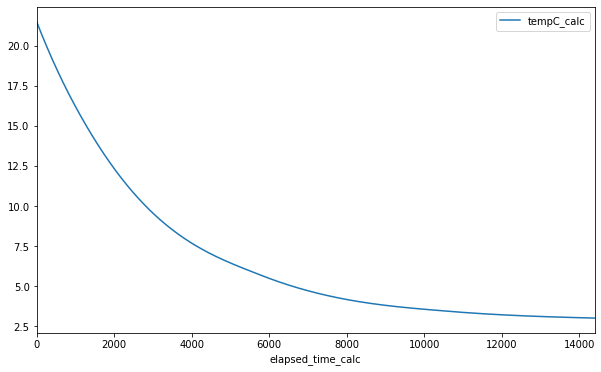

In [31]:
p2.plot(x='elapsed_time_calc',y='tempC_calc',figsize=(10,6))

In [32]:
R_total = 1

sol = solve_ivp(dTdt,[0, t_sec],[T_init],t_eval=t_eval) 
                #dif eq, time lapse,initial temp, eval

t = sol.t         #seconds
time = t/3600     #hours
T = sol.y[0]      #solution temperatures degK
T_C1 = T - 273.15  #convert degK to degC

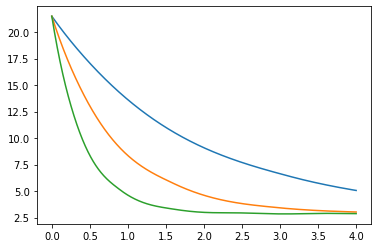

In [33]:
plt.plot(time,T_C)
plt.plot(time,T_C2)
plt.plot(time,T_C1)

In [34]:
#grab start of calc data and put with sync'd start of recorded data
p1 = pd.DataFrame()
p1['elapsed_time_calc']=pd.Series(t)
p1['tempC_calc']=pd.Series(T_C1)

#check for alignment and agreement with time and temp for sync'd plot
p1.head(20)

,elapsed_time_calc,tempC_calc
0,0,21.500000
1,10,21.376276
2,20,21.253372
3,30,21.131284
4,40,21.010006
5,50,20.889533
6,60,20.769858
7,70,20.650978
8,80,20.532886
9,90,20.415577


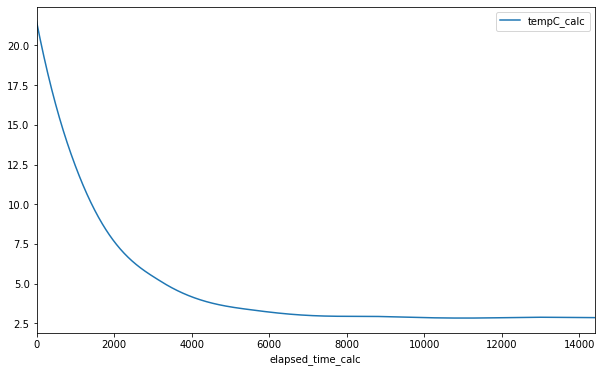

In [35]:
p1.plot(x='elapsed_time_calc',y='tempC_calc',figsize=(10,6))

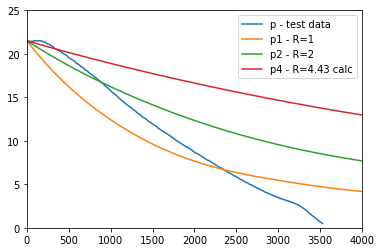

<Figure size 1440x432 with 0 Axes>

In [36]:
plt.plot(p['elapsed_time'],p['tempC_probe'])    

for frame in [p1, p2, p4]:
    plt.plot(frame['elapsed_time_calc'],frame['tempC_calc'])

plt.xlim(0,4000)
plt.ylim(0,25)
plt.legend(['p - test data','p1 - R=1','p2 - R=2','p4 - R=4.43 calc'])
plt.rcParams["figure.figsize"] = [10,6]
plt.figure(figsize=(20, 6))
plt.show()

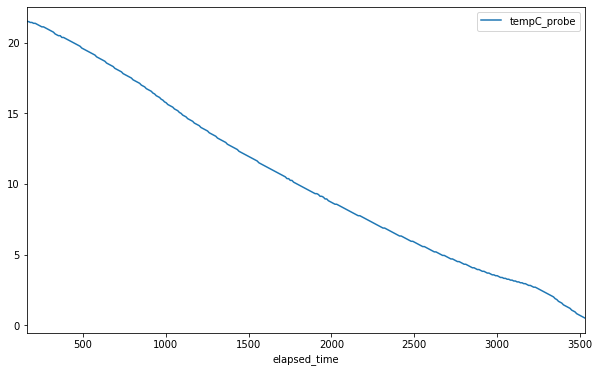

In [37]:
p[16:400].plot(x='elapsed_time',y='tempC_probe')

In [38]:
p=p[16:400]

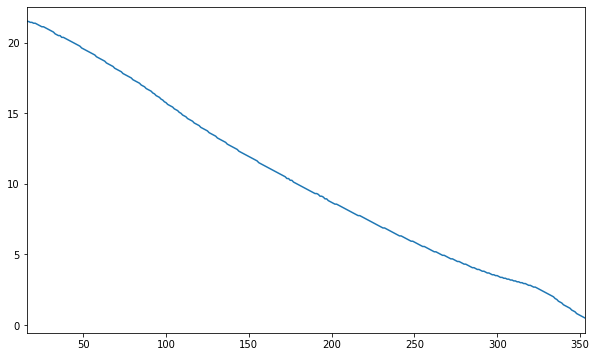

In [39]:
p['tempC_probe'].plot()

In [40]:
p['elapsed_time'].head()

16    161
17    171
18    181
19    191
20    201
Name: elapsed_time, dtype: int64

In [41]:
p['elapsed_time'] = p['elapsed_time']-161

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
p['elapsed_time'].head()

16     0
17    10
18    20
19    30
20    40
Name: elapsed_time, dtype: int64

In [43]:
p1['elapsed_time_calc']

0           0
1          10
2          20
3          30
4          40
        ...  
1436    14360
1437    14370
1438    14380
1439    14390
1440    14400
Name: elapsed_time_calc, Length: 1441, dtype: int64

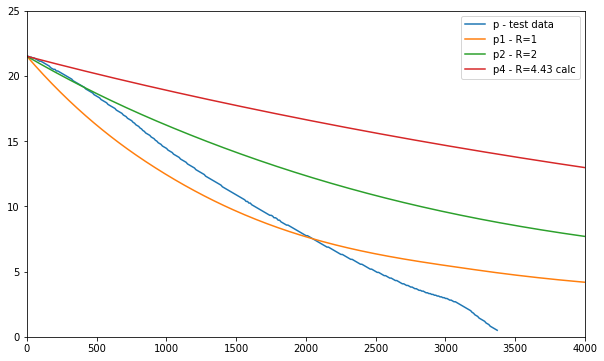

<Figure size 1440x432 with 0 Axes>

In [52]:
plt.plot(p['elapsed_time'],p['tempC_probe'])    

for frame in [p1, p2, p4]:
    plt.plot(frame['elapsed_time_calc'],frame['tempC_calc'])

plt.xlim(0,4000)
plt.ylim(0,25)
plt.legend(['p - test data','p1 - R=1','p2 - R=2','p4 - R=4.43 calc'])
plt.rcParams["figure.figsize"] = [10,6]
plt.figure(figsize=(20, 6))
plt.show()

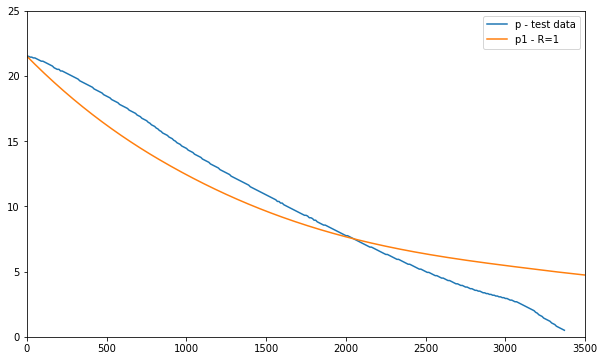

<Figure size 1440x432 with 0 Axes>

In [51]:
plt.plot(p['elapsed_time'],p['tempC_probe'])    
plt.plot(p1['elapsed_time_calc'],p1['tempC_calc'])  

plt.xlim(0,3500)
plt.ylim(0,25)
plt.legend(['p - test data','p1 - R=1'])
plt.rcParams["figure.figsize"] = [10,6]
plt.figure(figsize=(20, 6))
plt.show()